In [1]:
from functions import *
from methods import *
import seaborn as sns
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
path = '/Users/irashokar/documents/NOvA/files/Feb_test/descr/'
with open(path + 'history_SGD_50_descriminator_weights.pkl','rb') as f1:
    history = pkl.load(f1)

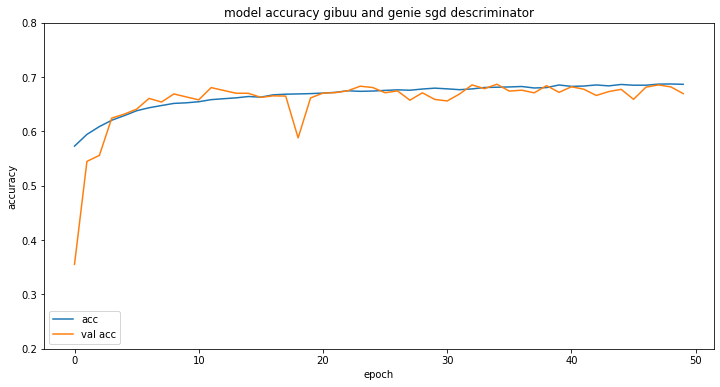

In [3]:
plt.figure(figsize=(12,6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy gibuu and genie sgd descriminator')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val acc'], loc='lower left')
plt.ylim(0.2,0.8)
plt.show()

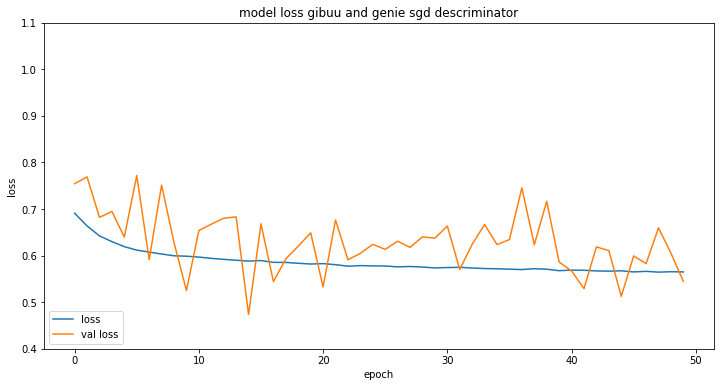

In [4]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss gibuu and genie sgd descriminator')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val loss'], loc='lower left')
plt.ylim(0.4,1.1)
plt.show()

In [5]:
with open(path+ 'descr_probabilities_short_weights_SGD_50_descriminator_weights.pkl','rb') as f2:
    probabilities = pkl.load(f2)
print(len(probabilities))
with open(path+ 'descr_test_labels_list_short_weights_SGD_50_descriminator_weights.pkl','rb') as f3:
    test_labels = pkl.load(f3)
print(len(test_labels))
#with open(path+ 'descr_test_weights_list_short_weights_SGD_5_descriminator_weights.pkl','rb') as f4:
#    gibuu_weights = pkl.load(f4)

14624
14630


In [6]:
predictions = []
for i in probabilities:
    max_index =np.where(i == np.max(i))[0][0]
    predictions.append(max_index)
    
test_vals = []
for i in test_labels:
    max_index =np.where(i == np.max(i))[0][0]
    test_vals.append(max_index)
    
#accuracy
acc = 0
for i in range(len(probabilities)):
    if test_vals[i]==predictions[i]:
        acc+=1
    else:
        pass
acc/=len(test_vals)

true_val = probabilities

print('Probabilities: \n')
print('Accuracy:{} \n'.format(acc))
for i in range(10):
    print(probabilities[i], '\n')
print('Predictions: \n')
print(predictions[:10], '\n')
print('Truth labels: \n')
print(test_vals[:10])

Probabilities: 

Accuracy:0.6554340396445659 

[0.5321031  0.46789682] 

[0.3265083  0.67349166] 

[0.5363025  0.46369746] 

[0.6803682  0.31963173] 

[0.53118527 0.46881482] 

[0.6269524  0.37304762] 

[0.6740597 0.3259403] 

[0.5872777  0.41272223] 

[0.39714044 0.60285956] 

[0.46432617 0.5356738 ] 

Predictions: 

[0, 1, 0, 0, 0, 0, 0, 0, 1, 1] 

Truth labels: 

[1, 1, 0, 0, 0, 1, 0, 0, 0, 1]


Text(0, 0.5, 'Count')

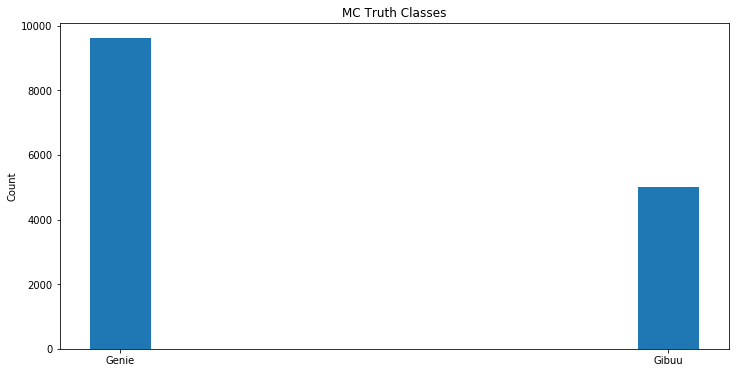

In [7]:
plt.figure(figsize=(12,6))
plt.hist(test_vals)
x = [0.05, 0.95]
class_names = ['Genie', 'Gibuu']
plt.xticks(x, class_names)
plt.title('MC Truth Classes')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

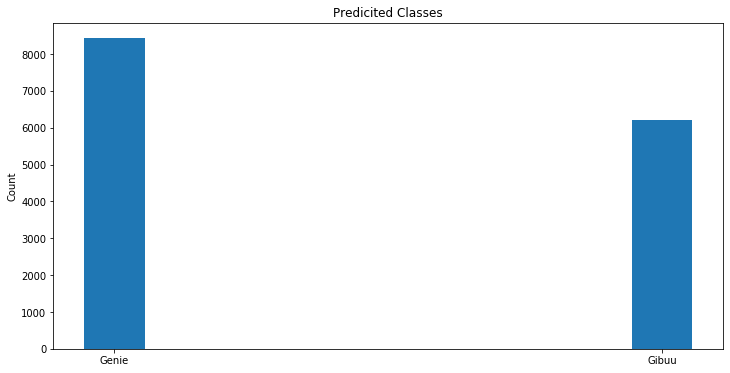

In [8]:
plt.figure(figsize=(12,6))
plt.hist(predictions)
plt.xticks(x, class_names)
plt.title('Predicited Classes')
plt.ylabel('Count')

[(0, 1)]

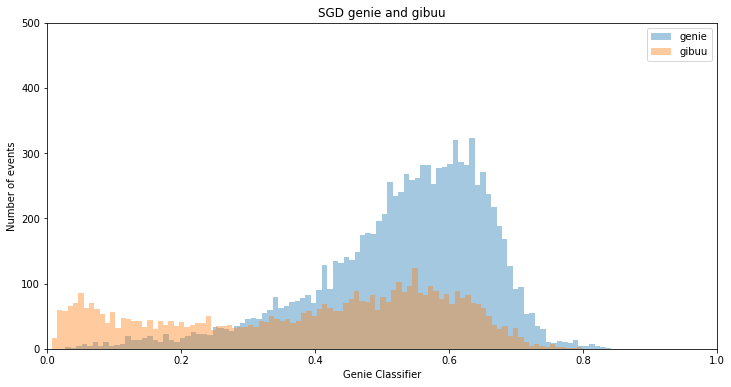

In [9]:
genie = []
gibuu = []
for i in range(len(probabilities)):
    if test_vals[i] ==0:
        genie.append(probabilities[i,0])
    elif test_vals[i] ==1:
        gibuu.append(probabilities[i,0])
        
plt.figure(figsize=(12,6))
g = sns.distplot(genie, bins = 100, kde=False)
g = sns.distplot(gibuu, bins = 100, kde=False)
plt.legend(['genie', 'gibuu'], loc='upper right')
plt.xlabel('Genie Classifier')
plt.ylabel('Number of events')
plt.title('SGD genie and gibuu')
g.set(ylim=(0,500))
g.set(xlim=(0,1))